In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [134]:
df = pd.read_csv("credit_card_fraudulent.csv")
df

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,24-09-2022 13:54,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,Apr-29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,24-07-2020 11:20,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,Mar-26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,18-03-2023 01:05,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,Nov-29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,07-01-2021 21:53,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,Sep-25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,16-12-2021 06:22,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,Mar-31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,31-10-2022 17:39,1356.65,Azad Khanna,28eb8e72b9129e20bd08bc74a0c83e0d723f7c71f91011...,Gopal Group,6488,Bongaigaon,EUR,Visa,Jul-33,dcb5d6e69e4ded78464ae2843f509daf65c9ca09dfdc9b...,12,3fa573a8-c8c1-4073-8842-763cf5f5f24b,0,1,Online,157.176.73.139,Tablet,NaN,Voluptatum consectetur minus inventore perspic...
1995,13-05-2023 00:49,1428.99,Ojas Kaur,a32f3326ed561b9afeaf18963b4e96334528651fee3f1d...,"Anand, Arya and Khosla",8891,Korba,USD,Visa,Jun-29,5f193b350c8aba4883dedf97367ef3080821470661d0a2...,0,b29423ce-f873-4521-8526-02ae7ddfacb2,0,1,Online,209.110.34.44,Tablet,NaN,Enim id cumque adipisci molestiae fuga delectu...
1996,01-01-2023 13:49,1870.28,Inaaya Grover,46896064a3159b3aa4232602a4425dbd8157e76ae7d263...,Borra-Chokshi,7360,Etawah,EUR,MasterCard,Oct-30,023849c38925e2af028a2eb4e1dc41afd7dc7a238195c1...,5,c2c18de5-75d0-49de-b7ba-54e624458a75,1,2,In-Person,220.179.191.174,Tablet,vermamadhup,Ipsa ducimus corrupti voluptate. Amet fugit ma...
1997,25-07-2023 14:15,484.61,Kabir Swaminathan,e0bc55aeec2417f4bc87d3988486cbf50622c5d9f1dec4...,Kamdar-Handa,3802,Rampur,USD,Visa,Oct-29,02f99d2002c703f1669e358989f1663e1e38e96297dcb3...,5,d33a8e50-c72e-4495-b682-fa695dd57e30,1,2,In-Person,217.250.160.73,Desktop,NaN,Rem sapiente quod soluta.\nCumque a nulla nesc...


# Handling Missing Values

In [135]:
df.isna().sum()

Transaction Date and Time                     0
Transaction Amount                            0
Cardholder Name                               0
Card Number (Hashed or Encrypted)             0
Merchant Name                                 0
Merchant Category Code (MCC)                  0
Transaction Location (City or ZIP Code)       0
Transaction Currency                          0
Card Type                                     0
Card Expiration Date                          0
CVV Code (Hashed or Encrypted)                0
Transaction Response Code                     0
Transaction ID                                0
Fraud                                         0
Previous Transactions                         0
Transaction Source                            0
IP Address                                    0
Device Information                            0
User Account Information                   1011
Transaction Notes                             0
dtype: int64

In [136]:
df = df.fillna(method="bfill")
df.isna().sum()

Transaction Date and Time                  0
Transaction Amount                         0
Cardholder Name                            0
Card Number (Hashed or Encrypted)          0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Card Expiration Date                       0
CVV Code (Hashed or Encrypted)             0
Transaction Response Code                  0
Transaction ID                             0
Fraud                                      0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
Device Information                         0
User Account Information                   0
Transaction Notes                          0
dtype: int64

In [137]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df["Transaction Currency"] = le.fit_transform(df["Transaction Currency"])
df

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,24-09-2022 13:54,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,1,MasterCard,Apr-29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,jloyal,Consequatur corporis minima ad vero deserunt n...
1,24-07-2020 11:20,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,0,American Express,Mar-26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,18-03-2023 01:05,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,2,Visa,Nov-29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,hrishita37,Unde beatae perspiciatis sapiente. Voluptates ...
3,07-01-2021 21:53,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,2,Visa,Sep-25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,hrishita37,Cupiditate repellendus necessitatibus quo occa...
4,16-12-2021 06:22,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,1,MasterCard,Mar-31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,hrishita37,Molestias assumenda consectetur itaque veritat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,31-10-2022 17:39,1356.65,Azad Khanna,28eb8e72b9129e20bd08bc74a0c83e0d723f7c71f91011...,Gopal Group,6488,Bongaigaon,0,Visa,Jul-33,dcb5d6e69e4ded78464ae2843f509daf65c9ca09dfdc9b...,12,3fa573a8-c8c1-4073-8842-763cf5f5f24b,0,1,Online,157.176.73.139,Tablet,vermamadhup,Voluptatum consectetur minus inventore perspic...
1995,13-05-2023 00:49,1428.99,Ojas Kaur,a32f3326ed561b9afeaf18963b4e96334528651fee3f1d...,"Anand, Arya and Khosla",8891,Korba,2,Visa,Jun-29,5f193b350c8aba4883dedf97367ef3080821470661d0a2...,0,b29423ce-f873-4521-8526-02ae7ddfacb2,0,1,Online,209.110.34.44,Tablet,vermamadhup,Enim id cumque adipisci molestiae fuga delectu...
1996,01-01-2023 13:49,1870.28,Inaaya Grover,46896064a3159b3aa4232602a4425dbd8157e76ae7d263...,Borra-Chokshi,7360,Etawah,0,MasterCard,Oct-30,023849c38925e2af028a2eb4e1dc41afd7dc7a238195c1...,5,c2c18de5-75d0-49de-b7ba-54e624458a75,1,2,In-Person,220.179.191.174,Tablet,vermamadhup,Ipsa ducimus corrupti voluptate. Amet fugit ma...
1997,25-07-2023 14:15,484.61,Kabir Swaminathan,e0bc55aeec2417f4bc87d3988486cbf50622c5d9f1dec4...,Kamdar-Handa,3802,Rampur,2,Visa,Oct-29,02f99d2002c703f1669e358989f1663e1e38e96297dcb3...,5,d33a8e50-c72e-4495-b682-fa695dd57e30,1,2,In-Person,217.250.160.73,Desktop,nirvi74,Rem sapiente quod soluta.\nCumque a nulla nesc...


In [138]:
df["Card Type"] = le.fit_transform(df["Card Type"])
df["Transaction Source"] = le.fit_transform(df["Transaction Source"])
df["Device Information"] = le.fit_transform(df["Device Information"])

df

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,24-09-2022 13:54,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,1,1,Apr-29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,1,18.106.240.6,2,jloyal,Consequatur corporis minima ad vero deserunt n...
1,24-07-2020 11:20,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,0,0,Mar-26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,1,212.48.185.128,1,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,18-03-2023 01:05,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,2,2,Nov-29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,0,17.190.112.46,1,hrishita37,Unde beatae perspiciatis sapiente. Voluptates ...
3,07-01-2021 21:53,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,2,2,Sep-25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,0,153.136.24.104,2,hrishita37,Cupiditate repellendus necessitatibus quo occa...
4,16-12-2021 06:22,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,1,1,Mar-31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,1,196.153.28.131,0,hrishita37,Molestias assumenda consectetur itaque veritat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,31-10-2022 17:39,1356.65,Azad Khanna,28eb8e72b9129e20bd08bc74a0c83e0d723f7c71f91011...,Gopal Group,6488,Bongaigaon,0,2,Jul-33,dcb5d6e69e4ded78464ae2843f509daf65c9ca09dfdc9b...,12,3fa573a8-c8c1-4073-8842-763cf5f5f24b,0,1,1,157.176.73.139,2,vermamadhup,Voluptatum consectetur minus inventore perspic...
1995,13-05-2023 00:49,1428.99,Ojas Kaur,a32f3326ed561b9afeaf18963b4e96334528651fee3f1d...,"Anand, Arya and Khosla",8891,Korba,2,2,Jun-29,5f193b350c8aba4883dedf97367ef3080821470661d0a2...,0,b29423ce-f873-4521-8526-02ae7ddfacb2,0,1,1,209.110.34.44,2,vermamadhup,Enim id cumque adipisci molestiae fuga delectu...
1996,01-01-2023 13:49,1870.28,Inaaya Grover,46896064a3159b3aa4232602a4425dbd8157e76ae7d263...,Borra-Chokshi,7360,Etawah,0,1,Oct-30,023849c38925e2af028a2eb4e1dc41afd7dc7a238195c1...,5,c2c18de5-75d0-49de-b7ba-54e624458a75,1,2,0,220.179.191.174,2,vermamadhup,Ipsa ducimus corrupti voluptate. Amet fugit ma...
1997,25-07-2023 14:15,484.61,Kabir Swaminathan,e0bc55aeec2417f4bc87d3988486cbf50622c5d9f1dec4...,Kamdar-Handa,3802,Rampur,2,2,Oct-29,02f99d2002c703f1669e358989f1663e1e38e96297dcb3...,5,d33a8e50-c72e-4495-b682-fa695dd57e30,1,2,0,217.250.160.73,0,nirvi74,Rem sapiente quod soluta.\nCumque a nulla nesc...


In [140]:

df = df[["Transaction Amount","Transaction Currency","Transaction Response Code","Card Type","Transaction Source","Device Information","Fraud"]]
df

,Transaction Amount,Transaction Currency,Transaction Response Code,Card Type,Transaction Source,Device Information,Fraud
0,285.88,1,5,1,1,2,1
1,1777.32,0,12,0,1,1,1
2,3939.01,2,5,2,0,1,1
3,376.44,2,5,2,0,2,0
4,1687.33,1,5,1,1,0,1
...,...,...,...,...,...,...,...
1994,1356.65,0,12,2,1,2,0
1995,1428.99,2,0,2,1,2,0
1996,1870.28,0,5,1,0,2,1
1997,484.61,2,5,2,0,0,1


# Assign X and Y values

In [141]:
x = df.iloc[:,:-1]
x

,Transaction Amount,Transaction Currency,Transaction Response Code,Card Type,Transaction Source,Device Information
0,285.88,1,5,1,1,2
1,1777.32,0,12,0,1,1
2,3939.01,2,5,2,0,1
3,376.44,2,5,2,0,2
4,1687.33,1,5,1,1,0
...,...,...,...,...,...,...
1994,1356.65,0,12,2,1,2
1995,1428.99,2,0,2,1,2
1996,1870.28,0,5,1,0,2
1997,484.61,2,5,2,0,0


In [142]:
y = df.iloc[:,-1:]
y

,Fraud
0,1
1,1
2,1
3,0
4,1
...,...
1994,0
1995,0
1996,1
1997,1


# Training and Testing the Data


In [143]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (1599, 6)

Training data-y-Shape:	 (1599, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (400, 6)

Testing data(y-outcome)shape:	 (400, 1)


# Model Development with Logistic Regression Algorithm

In [144]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver="liblinear",verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0]

Testing is

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance Measures

In [145]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.52

Confusion Matrix:
 [[ 99 113]
 [ 79 109]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.47      0.51       212
           1       0.49      0.58      0.53       188

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.53      0.52      0.52       400


Precision Score:	 0.49099099099099097

Recall Score:	 0.5797872340425532

F1 Score:	 0.5317073170731708


In [146]:
log_reg.classes_

array([0, 1], dtype=int64)

In [147]:
log_reg.coef_

array([[-2.35703070e-05,  7.69482736e-03,  5.79988401e-03,
         1.47182920e-01,  5.77298628e-02, -1.10747676e-01]])

In [148]:
log_reg.intercept_

array([-0.03415902])

In [149]:
log_reg.fit_intercept

True

In [150]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

# Feature Engineering Techniques 

# 1. Scaling

In [151]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)

In [152]:
sc_x.shape

(1999, 6)

In [153]:
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=0.2)
# Here xtrain,xtest are splitted values of Scaled x
#and ytrain,ytest are splitted values of y(we donot scale y as it is a dependendent/target varibale)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (1599, 6)

Training data-y-Shape:	 (1599, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (400, 6)

Testing data(y-outcome)shape:	 (400, 1)


In [154]:
# After Scaling-Build Logistic Regression model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score,f1_score

In [155]:
log_reg=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg.fit(xtrain,ytrain)
#xtrain,ytrain are after scaling values
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))



print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0
 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0]

Testing is

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 2. Using MinMax Scaler

In [156]:
from sklearn.preprocessing import MinMaxScaler
mm_sc=MinMaxScaler()
mm_x=mm_sc.fit_transform(x)

In [157]:
xtrain,xtest,ytrain,ytest=train_test_split(mm_x,y,test_size=0.2)
# Here xtrain,xtest are splitted values of Scaled x
#and ytrain,ytest are splitted values of y(we donot scale y as it is a dependendent/target varibale)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)


******************Training Data shape***************

Training data-x-Shape:	 (1599, 6)

Training data-y-Shape:	 (1599, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (400, 6)

Testing data(y-outcome)shape:	 (400, 1)


In [158]:
#After Scaling-build log reg model
log_reg=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg.fit(xtrain,ytrain)
#xtrain,ytrain are after scaling values
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))



print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0
 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0
 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1
 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0
 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0
 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0]

Testing is

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Handling the Imbalanced Data

In [160]:
df["Fraud"].value_counts()

0    1005
1     994
Name: Fraud, dtype: int64

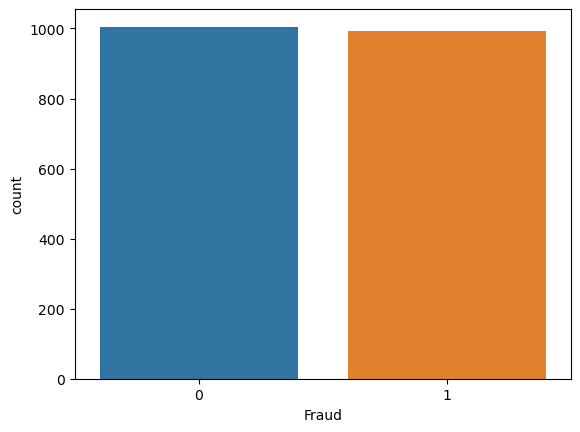

In [162]:
sns.countplot(df, x="Fraud")
plt.show()


# Two Methods to balance this imbalanced data

# 1. Upsample

Majority length:	 1005

Minority length:	 994
(2010, 7)



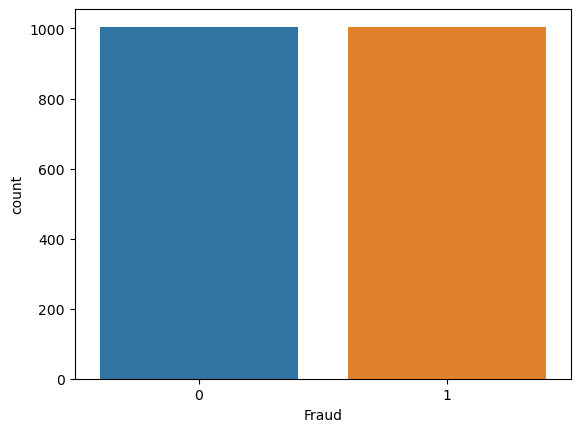

In [164]:
from sklearn.utils import resample

df_majority=df[df.Fraud==0]
df_minority=df[df.Fraud==1]

print('Majority length:\t',len(df_majority))
print()
print('Minority length:\t',len(df_minority))
print('='*100)

#Upsamplw

df_minority_up=resample(df_minority,replace=True,n_samples=1005,random_state=12)
# replace-sample with replacement
#n_samples=to match with the majority class

df_upsampled=pd.concat([df_majority,df_minority_up])
print(df_upsampled.shape)
print()
sns.countplot(df_upsampled, x="Fraud")
plt.show()

In [166]:
df_upsampled['Fraud'].value_counts()

0    1005
1    1005
Name: Fraud, dtype: int64

# Build Log reg Model with Upsaqmpled Data

In [168]:
#Loading data from upsampled dataset and splitting them 
x=df_upsampled.iloc[:,:-1]
y=df_upsampled.iloc[:,-1:]


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (1608, 6)

Training data-y-Shape:	 (1608, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (402, 6)

Testing data(y-outcome)shape:	 (402, 1)


In [169]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


log_reg=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))


print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0
 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0
 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0
 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1]

Testin

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Dowm Sample Model

Majority length:	 1005

Minority length:	 994
(1988, 7)



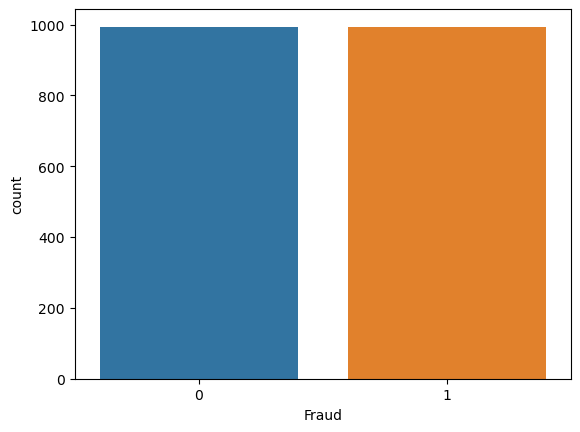

In [171]:
from sklearn.utils import resample

df_majority=df[df.Fraud==0]
df_minority=df[df.Fraud==1]

print('Majority length:\t',len(df_majority))
print()
print('Minority length:\t',len(df_minority))
print('='*100)

#Upsamplw

df_majority_down=resample(df_majority,replace=False,n_samples=994,random_state=12)
# replace-sample with replacement
#n_samples=to match with the majority class

df_downsampled=pd.concat([df_majority_down,df_minority])
#bringing down the count of majority class to min class and combining them to form a new downsampled dataset
#This downsampled dataset is further used to build a log reg model
print(df_downsampled.shape)
print()
sns.countplot(df_downsampled, x="Fraud")
plt.show()

In [174]:
df_downsampled['Fraud'].value_counts()

0    994
1    994
Name: Fraud, dtype: int64

# Build Log reg Model with Upsaqmpled Data

In [176]:
#Loading data from downsampled dataset and splitting them 
x=df_downsampled.iloc[:,:-1]
y=df_downsampled.iloc[:,-1:]


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (1590, 6)

Training data-y-Shape:	 (1590, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (398, 6)

Testing data(y-outcome)shape:	 (398, 1)


In [177]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


log_reg=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))


print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1
 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1
 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0]

Testing is als

C:\Users\Charanteja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
